In [150]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import sweetviz as sv


In [151]:
# Reading a CSV titanic file (multiClassification labeled data)
df = pd.read_csv(r"C:\Users\ammar\Downloads\customer_feedback_satisfaction.csv")

In [152]:
#========================================================================Data info, EDA============================================================================= 

In [153]:
df.head()

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,1,56,Male,UK,83094,5,8,5,Low,Bronze,100.0
1,2,69,Male,UK,86860,10,2,8,Medium,Gold,100.0
2,3,46,Female,USA,60173,8,10,18,Medium,Silver,100.0
3,4,32,Female,UK,73884,7,10,16,Low,Gold,100.0
4,5,60,Male,UK,97546,6,4,13,Low,Bronze,82.0


In [154]:
print(df.isnull().sum())

CustomerID           0
Age                  0
Gender               0
Country              0
Income               0
ProductQuality       0
ServiceQuality       0
PurchaseFrequency    0
FeedbackScore        0
LoyaltyLevel         0
SatisfactionScore    0
dtype: int64


In [155]:
print(df.duplicated().sum())

0


In [156]:
df.shape

(38444, 11)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         38444 non-null  int64  
 1   Age                38444 non-null  int64  
 2   Gender             38444 non-null  object 
 3   Country            38444 non-null  object 
 4   Income             38444 non-null  int64  
 5   ProductQuality     38444 non-null  int64  
 6   ServiceQuality     38444 non-null  int64  
 7   PurchaseFrequency  38444 non-null  int64  
 8   FeedbackScore      38444 non-null  object 
 9   LoyaltyLevel       38444 non-null  object 
 10  SatisfactionScore  38444 non-null  float64
dtypes: float64(1), int64(6), object(4)
memory usage: 3.2+ MB


In [158]:
df.describe()
#Income -> scaling
#SatisfactionScore, Income-> skewed

,CustomerID,Age,Income,ProductQuality,ServiceQuality,PurchaseFrequency,SatisfactionScore
count,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000
mean,19222.500000,43.496853,75076.619238,5.494746,5.492769,10.453881,85.276409
std,11097.971211,14.972748,25975.752966,2.873192,2.875812,5.765621,16.898577
min,1.000000,18.000000,30001.000000,1.000000,1.000000,1.000000,4.280000
25%,9611.750000,31.000000,52624.500000,3.000000,3.000000,5.000000,74.470000
50%,19222.500000,43.000000,75236.000000,5.000000,5.000000,10.000000,91.270000
75%,28833.250000,56.000000,97606.750000,8.000000,8.000000,15.000000,100.000000
max,38444.000000,69.000000,119999.000000,10.000000,10.000000,20.000000,100.000000


In [159]:
df.Country.unique()

array(['UK', 'USA', 'France', 'Germany', 'Canada'], dtype=object)

In [160]:
#data cleaning

df.drop(['CustomerID'], axis=1, inplace=True)

In [161]:
#=============================================================================Visualization, EDA=============================================================================

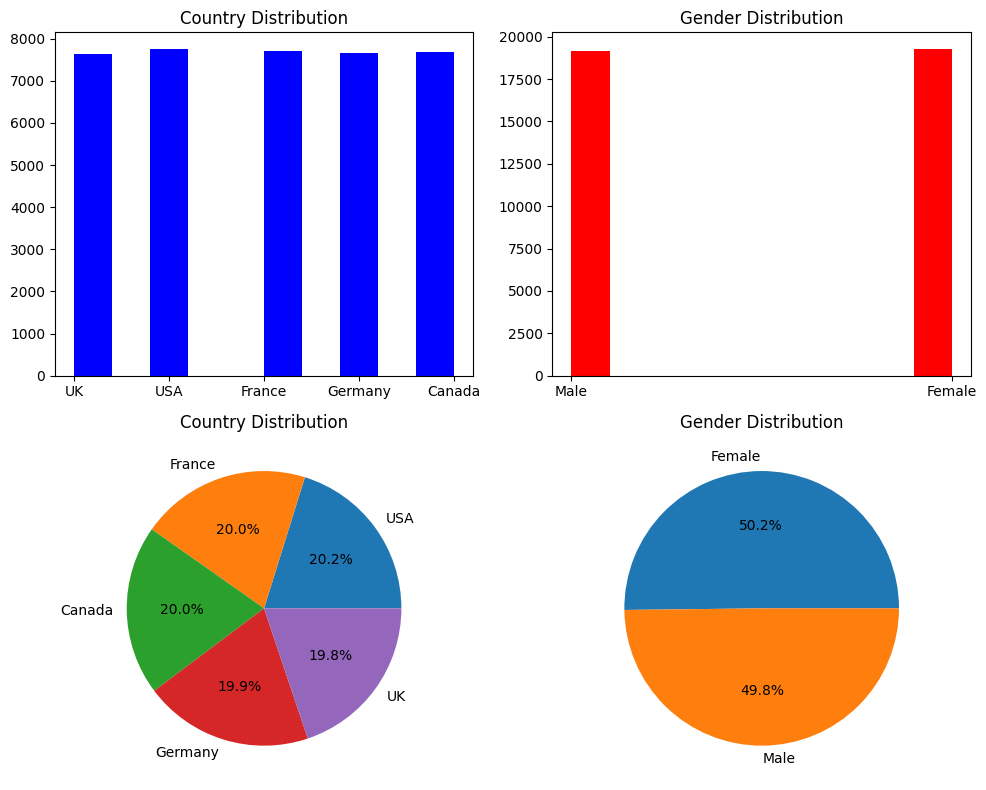

In [162]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# (0,0) → Line plot
axs[0, 0].hist(df['Country'], color="blue")
axs[0, 0].set_title("Country Distribution")

# (0,1) → Scatter plot
axs[0, 1].hist(df['Gender'], color="red")
axs[0, 1].set_title("Gender Distribution")

# (1,0) → Bar chart
loyalty_counts = df['Country'].value_counts()
axs[1, 0].pie(loyalty_counts, labels=loyalty_counts.index, autopct='%1.1f%%')
axs[1, 0].set_title("Country Distribution")

# (1,1) → Histogram
loyalty_counts = df['Gender'].value_counts()
axs[1, 1].pie(loyalty_counts, labels=loyalty_counts.index, autopct='%1.1f%%')
axs[1, 1].set_title("Gender Distribution")

plt.tight_layout()
plt.show()

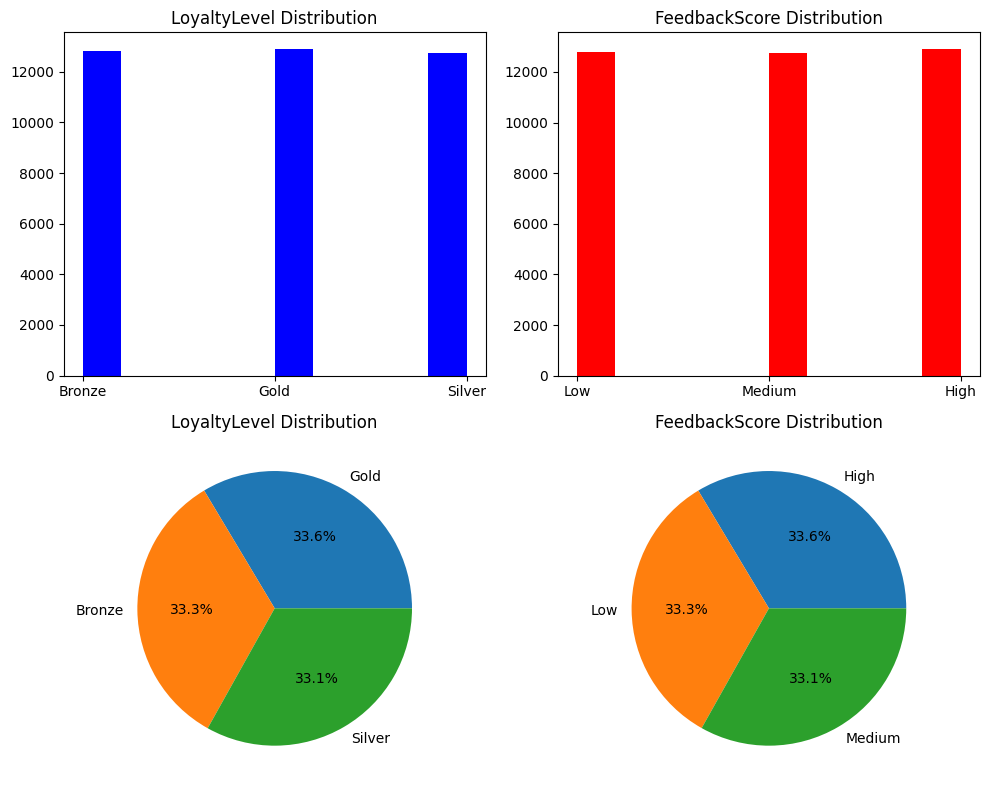

In [163]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# (0,0) → Line plot
axs[0, 0].hist(df['LoyaltyLevel'], color="blue")
axs[0, 0].set_title("LoyaltyLevel Distribution")

# (0,1) → Scatter plot
axs[0, 1].hist(df['FeedbackScore'], color="red")
axs[0, 1].set_title("FeedbackScore Distribution")

# (1,0) → Bar chart
loyalty_counts = df['LoyaltyLevel'].value_counts()
axs[1, 0].pie(loyalty_counts, labels=loyalty_counts.index, autopct='%1.1f%%')
axs[1, 0].set_title("LoyaltyLevel Distribution")

# (1,1) → Histogram
loyalty_counts = df['FeedbackScore'].value_counts()
axs[1, 1].pie(loyalty_counts, labels=loyalty_counts.index, autopct='%1.1f%%')
axs[1, 1].set_title("FeedbackScore Distribution")

plt.tight_layout()
plt.show()

In [164]:
#======================================================================================== Encoding ==========================================================================================

In [165]:
le_sex = LabelEncoder()
df['Gender'] = le_sex.fit_transform(df['Gender'])

df['LoyaltyLevel'] = df['LoyaltyLevel'].map({'Bronze': 0,'Silver': 1,'Gold': 2})
df['FeedbackScore'] = df['FeedbackScore'].map({'Low': 0,'Medium': 1,'High': 2})

df = pd.get_dummies(df, columns=['Country'], drop_first=True)

In [166]:
#Categorical Target (Very Low-> 0, Low-> 1, Medium-> 2, High-> 3)

df['SatisfactionLevel'] = pd.cut(
    df['SatisfactionScore'],
    bins=[-1, 25, 50, 75, 100],
    labels=[0, 1, 2, 3]
).astype(int)

In [167]:
df.head()

,Age,Gender,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore,Country_France,Country_Germany,Country_UK,Country_USA,SatisfactionLevel
0,56,1,83094,5,8,5,0,0,100.0,False,False,True,False,3
1,69,1,86860,10,2,8,1,2,100.0,False,False,True,False,3
2,46,0,60173,8,10,18,1,1,100.0,False,False,False,True,3
3,32,0,73884,7,10,16,0,2,100.0,False,False,True,False,3
4,60,1,97546,6,4,13,0,0,82.0,False,False,True,False,3


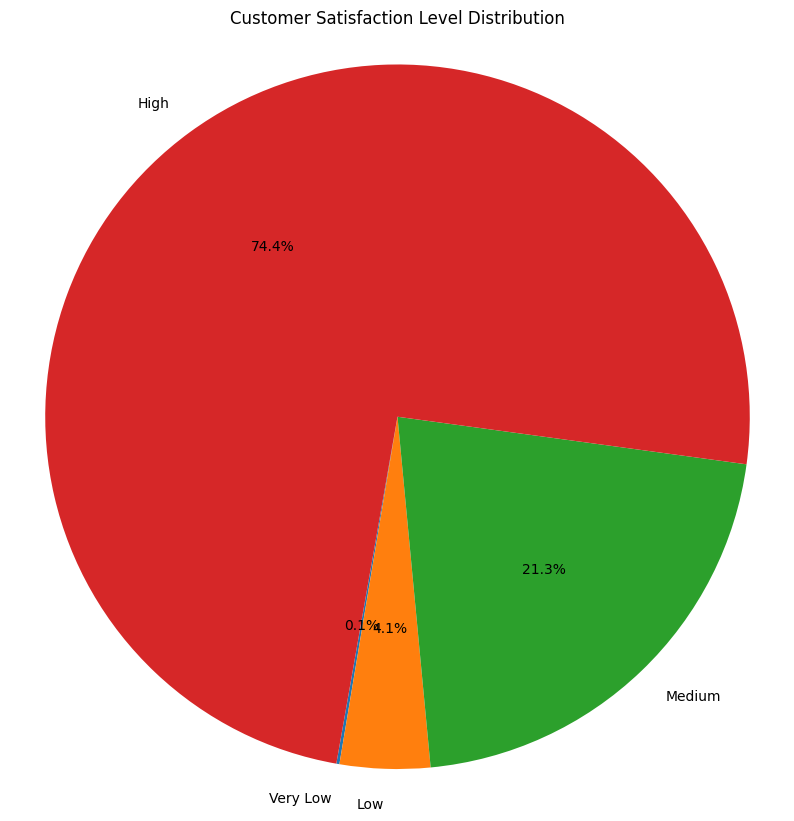

In [168]:
plt.figure(figsize=(10, 10))

level_counts = df['SatisfactionLevel'].value_counts().sort_index()
labels = ['Very Low', 'Low', 'Medium', 'High']

plt.pie(level_counts.values, labels=labels, autopct='%1.1f%%', startangle=-100)

plt.title('Customer Satisfaction Level Distribution')
plt.axis('equal')
plt.show()

In [169]:
#============================================================================== outlier detection (boxplot) ====================================================================================

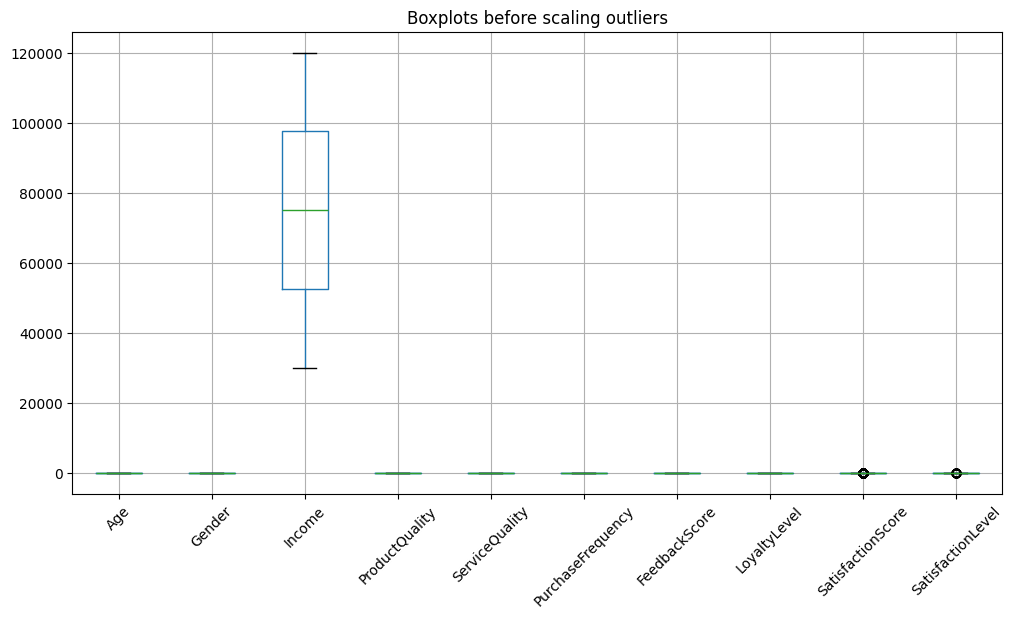

In [170]:
numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.title("Boxplots before scaling outliers")
plt.xticks(rotation=45)
plt.show()

In [171]:
#======================================================================================== feature scaling ===================================================================================== 

In [172]:
X = df.drop(columns=['SatisfactionScore', 'SatisfactionLevel'])
y = df['SatisfactionLevel']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X.head()

,Age,Gender,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,Country_France,Country_Germany,Country_UK,Country_USA
0,56,1,83094,5,8,5,0,0,False,False,True,False
1,69,1,86860,10,2,8,1,2,False,False,True,False
2,46,0,60173,8,10,18,1,1,False,False,False,True
3,32,0,73884,7,10,16,0,2,False,False,True,False
4,60,1,97546,6,4,13,0,0,False,False,True,False


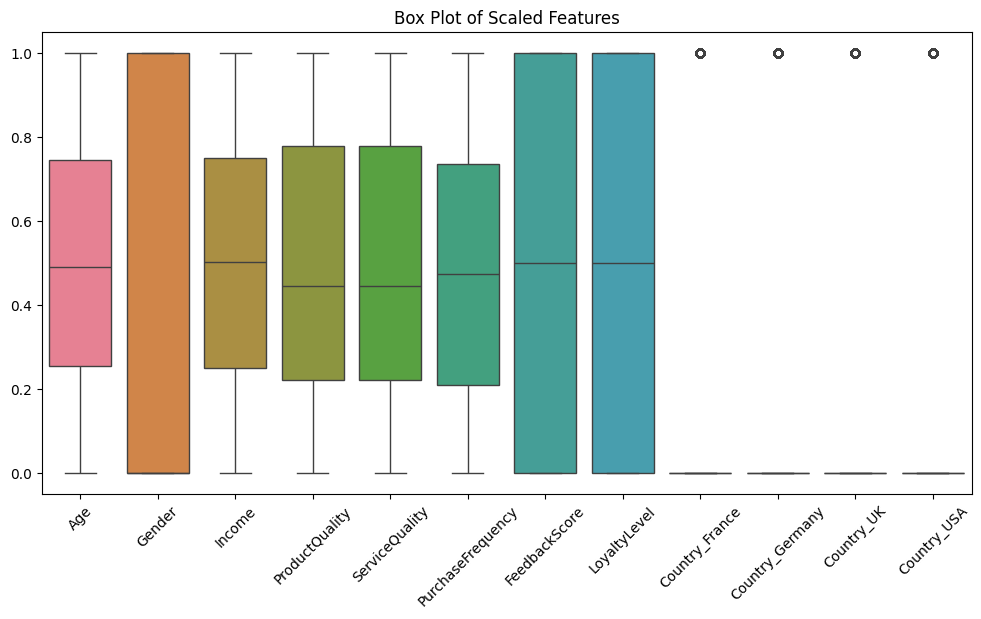

In [173]:
#box plot after featurescaling 

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

plt.figure(figsize=(12,6))
sns.boxplot(data=X_scaled_df)
plt.xticks(rotation=45)
plt.title("Box Plot of Scaled Features")
plt.show()

In [174]:
#================================================================================= Feature Engineering ======================================================================================

In [175]:
#removing SatisfactionScore column from df

df.drop(['SatisfactionScore'], axis=1, inplace=True)

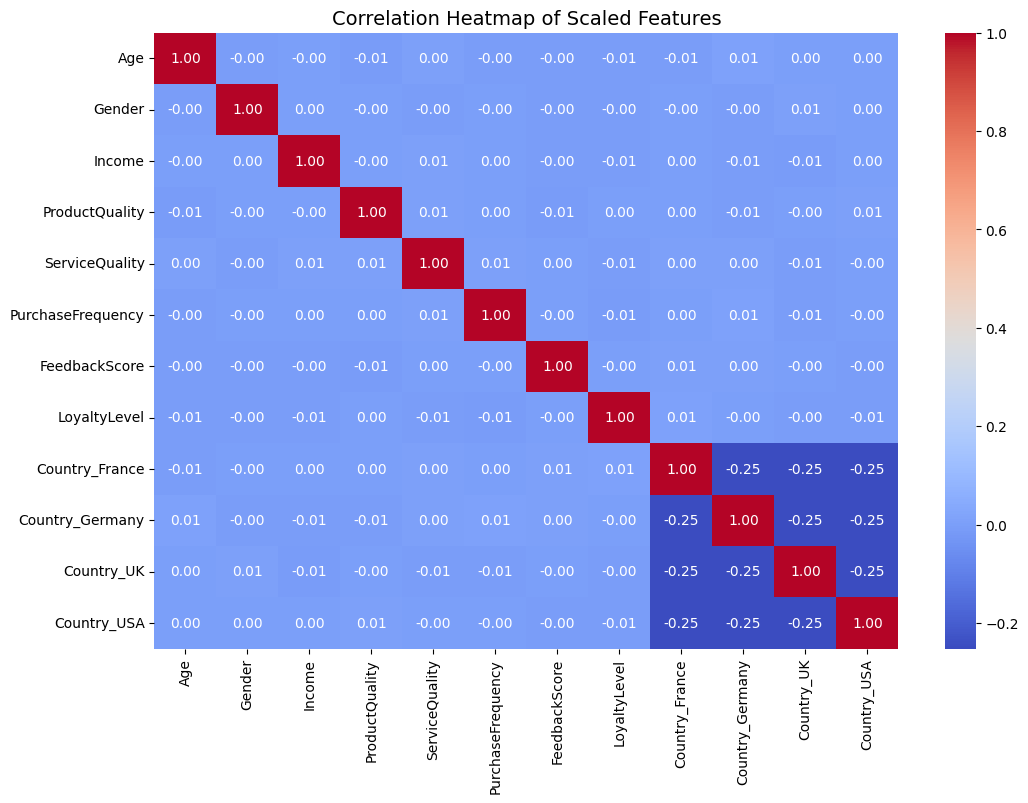

In [176]:
#Correlation Heatmap after scaling (for X_scaled_df)

corr_scaled = X_scaled_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_scaled, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Scaled Features", fontsize=14)
plt.show()

LOW Multicollinearity between features


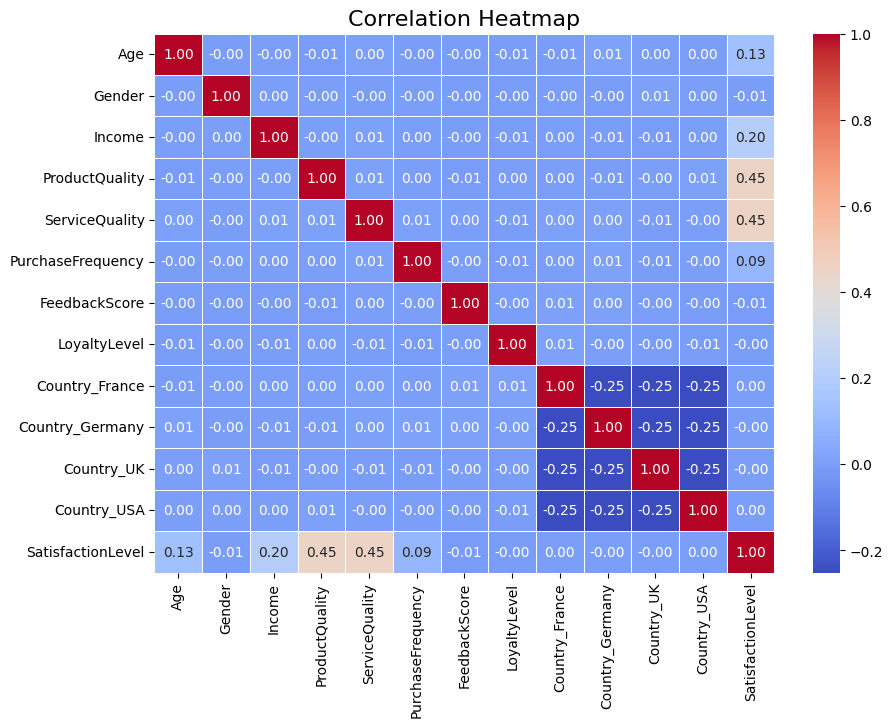

In [177]:
#Correlation Heatmap before scaling (for all df)

corr = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [178]:
#Feature Selection

chi2_fs = SelectKBest(score_func=chi2, k='all').fit(X_scaled, y)
print("Chi2:", chi2_fs.scores_)
print('--------------------------------------------------------------------------------------------------------------')

f_fs = SelectKBest(score_func=f_classif, k='all').fit(X_scaled, y)
print("F-test:", f_fs.scores_)
print('---------------------------------------------------------------------------------------------------------------')

mi_fs = SelectKBest(score_func=mutual_info_classif, k='all').fit(X_scaled, y)
print("Mutual Info:", mi_fs.scores_)

Chi2: [1.14215127e+02 1.22603725e+00 2.65479881e+02 1.63793695e+03
 1.67248767e+03 6.39243883e+01 1.81957728e+00 6.68220032e-01
 2.36283924e-01 1.40893594e+00 2.25982592e+00 2.61646884e-01]
--------------------------------------------------------------------------------------------------------------
F-test: [2.24683712e+02 8.14275022e-01 5.55049194e+02 3.38115823e+03
 3.46183798e+03 1.16172333e+02 1.82085956e+00 6.67812120e-01
 9.85004378e-02 5.86358946e-01 9.39707502e-01 1.09269191e-01]
---------------------------------------------------------------------------------------------------------------
Mutual Info: [0.00752692 0.00413066 0.01972887 0.11875648 0.12186888 0.00773361
 0.00180594 0.00095791 0.00327603 0.00090201 0.00343092 0.00360667]


Chi-Square Test:   chi2-> correlation between features and target-> which is very high :)

Analysis of Variance (ANOVA): f_fs-> is features can Satisfaction btween Satisfaction_Levels or not -> which is very high :)


Mutual Information (MI): mi_fs-> calc features Information Gain, is this feature help me to reduce Uncertainty to know the target or not, //   get linear and nonlinear relation between features

In [192]:
# PCA to reduce Dimensions //Feature Extraction

pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)
print("Explained Variance Ratio (PCA):", pca.explained_variance_ratio_)

Explained Variance Ratio (PCA): [0.14798039 0.11922827 0.11829911 0.11757458 0.0990397  0.0987585
 0.06068176 0.06007214 0.05446817]


after Dimensionality reduction, X_pca have 87.61% of data, it's compress data in 9D without removing any informations

In [193]:
# Feature Expansion (Polynomial Features)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)
print("Original Features:", X_scaled.shape[1])
print("Expanded Features:", X_poly.shape[1])

Original Features: 12
Expanded Features: 90


In [194]:
#================================================================================== MODELS and its Evaluation ==================================================================================

In [195]:
# Train& Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [196]:
# ML Models Algorithtms

models = {
    "LogisticRegression": LogisticRegression(max_iter=500),
    "SVM": SVC(),
    "RandomForest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "ANN": MLPClassifier(max_iter=500)
}

results = {}

In [197]:
# GridSearchCV() parameters

param_grids = {
    "LogisticRegression": {
        "C": [0.01, 0.1, 1, 10, 100]                                        #classification error control
    },
    "SVM": {
        "C": [0.1, 1, 10],                                                  #classification error control
        "gamma": ["scale", 0.01, 0.1, 1],                                   #Traning points effect range
        "kernel": ["linear", "rbf"]                                         #kernal type
    },
    "AdaBoost": {
        "n_estimators": [50, 100, 200],                                     #num of weak learners
        "learning_rate": [0.001, 0.01, 0.1, 1]                              #of weak learners
    },
    "ANN": {
        "hidden_layer_sizes": [(50,), (100,), (100,50)],                    #num of hidden layers
        "alpha": [0.0001, 0.001, 0.01],                                     #classification error control
        "learning_rate_init": [0.001, 0.01],                                #on gradient decent
        "early_stopping": [True]                                            #avoid overfitting
    }
}


In [198]:
#next confution matrix 3*3 shape 

#               Predicted
#          0    1     2     3
#      0   0    5     2     0
# True 1   0    98    225   6
#      2   0    45    1002  561
#      3   0    1     317   5427

#----------------------------------------------------
#to calc precision, recall, f1-score:
#TP= diaagonal
#FP= sum(columns-TP)
#FN= sum(Raws-TP)


===== LogisticRegression =====
Fitting 3 folds for each of 5 candidates, totalling 15 fits


Best Params: {'C': 1}
Accuracy: 0.8642
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.67      0.40      0.50       329
           2       0.69      0.66      0.67      1608
           3       0.92      0.95      0.93      5745

    accuracy                           0.86      7689
   macro avg       0.57      0.50      0.53      7689
weighted avg       0.86      0.86      0.86      7689



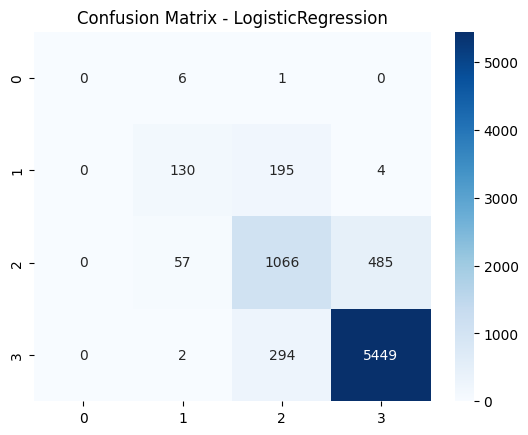


===== SVM =====
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Params: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.8641
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.68      0.39      0.50       329
           2       0.68      0.67      0.68      1608
           3       0.92      0.95      0.93      5745

    accuracy                           0.86      7689
   macro avg       0.57      0.50      0.53      7689
weighted avg       0.86      0.86      0.86      7689



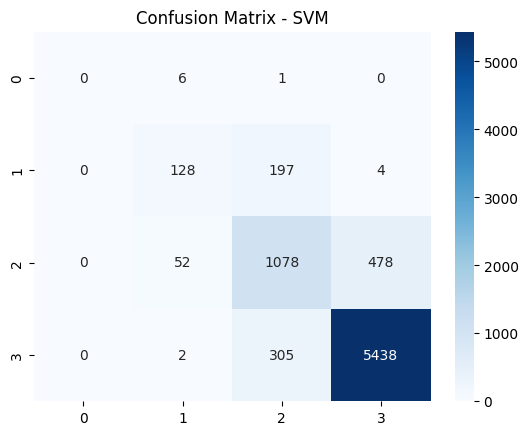


===== RandomForest =====
Accuracy: 0.8517
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.67      0.34      0.45       329
           2       0.66      0.62      0.64      1608
           3       0.91      0.95      0.93      5745

    accuracy                           0.85      7689
   macro avg       0.56      0.48      0.50      7689
weighted avg       0.84      0.85      0.84      7689



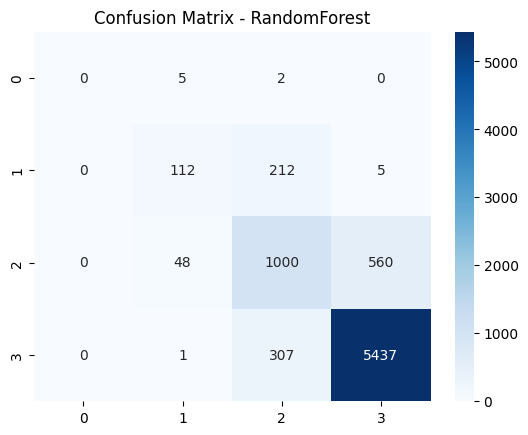


===== AdaBoost =====
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Params: {'learning_rate': 1, 'n_estimators': 200}
Accuracy: 0.8484
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.61      0.47      0.53       329
           2       0.65      0.62      0.63      1608
           3       0.91      0.94      0.92      5745

    accuracy                           0.85      7689
   macro avg       0.54      0.50      0.52      7689
weighted avg       0.84      0.85      0.84      7689



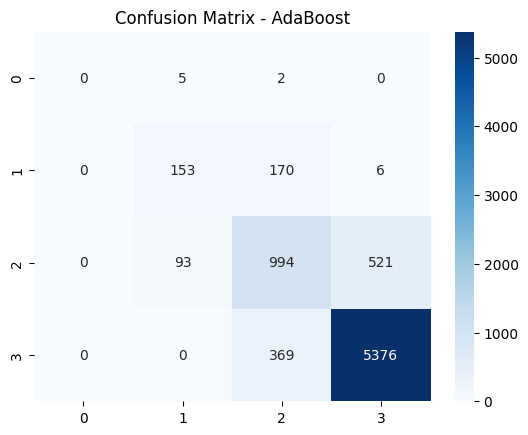


===== ANN =====
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Params: {'alpha': 0.001, 'early_stopping': True, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001}
Accuracy: 0.8638
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.67      0.40      0.50       329
           2       0.68      0.67      0.67      1608
           3       0.92      0.95      0.93      5745

    accuracy                           0.86      7689
   macro avg       0.57      0.50      0.53      7689
weighted avg       0.86      0.86      0.86      7689



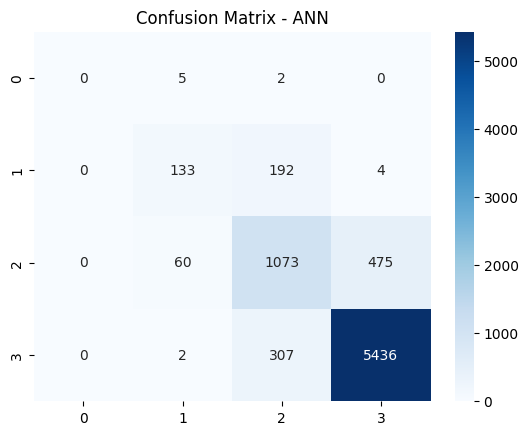

In [199]:
# GridSearchCV Loop
for name, model in models.items():
    print(f"\n===== {name} =====")
    if name in param_grids:
        grid = GridSearchCV(model, param_grids[name], cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        print("Best Params:", grid.best_params_)
    else:
        best_model = model.fit(X_train, y_train)
    
    #test model& accuracy calculations
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"Accuracy: {acc:.4f}")

    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


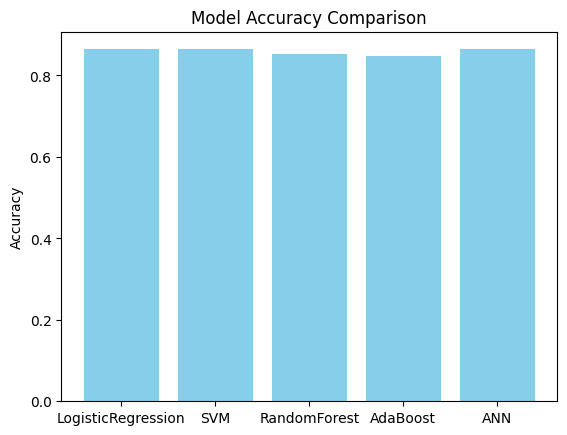

In [200]:
# Compare Models Results

plt.bar(results.keys(), results.values(), color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

In [201]:
# Best Model Is

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"Best model saved: {best_model_name}")

Best model saved: LogisticRegression


In [ ]:
#print(df.columns)

Index(['Age', 'Gender', 'Income', 'ProductQuality', 'ServiceQuality',
       'PurchaseFrequency', 'FeedbackScore', 'LoyaltyLevel', 'Country_France',
       'Country_Germany', 'Country_UK', 'Country_USA', 'SatisfactionLevel'],
      dtype='object')


In [203]:
# #Categorical Target (Very Low-> 0, Low-> 1, Medium-> 2, High-> 3)
# df['SatisfactionLevel'] = df['SatisfactionLevel'].map({'Very Low': 0,'Low': 1,'Medium': 2, 'High': 3})

# Sweetviz Report
# report = sv.analyze(df)
# report.show_html("sweetviz_full_report.html")



